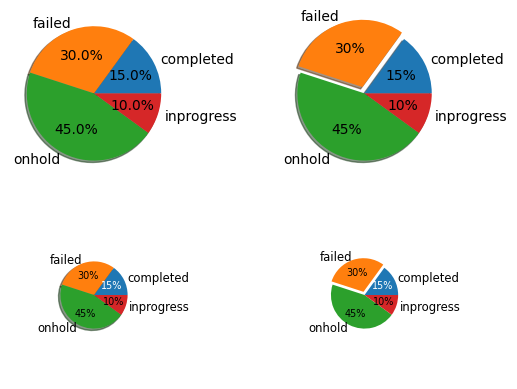

In [2]:
import matplotlib.pyplot as plt

# Some data
labels = 'completed', 'failed', 'onhold', 'inprogress'
fracs = [15, 30, 45, 10]

# Make figure and axes
fig, axs = plt.subplots(2, 2)

# A standard pie plot
axs[0, 0].pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

# Shift the second slice using explode
axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1, 0, 0))

# Adapt radius and text size for a smaller pie
patches, texts, autotexts = axs[1, 0].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=True, radius=0.5)
# Make percent texts even smaller
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

# Use a smaller explode and turn of the shadow for better visibility
patches, texts, autotexts = axs[1, 1].pie(fracs, labels=labels,
                                          autopct='%.0f%%',
                                          textprops={'size': 'smaller'},
                                          shadow=False, radius=0.5,
                                          explode=(0, 0.05, 0, 0))
plt.setp(autotexts, size='x-small')
autotexts[0].set_color('white')

plt.show()

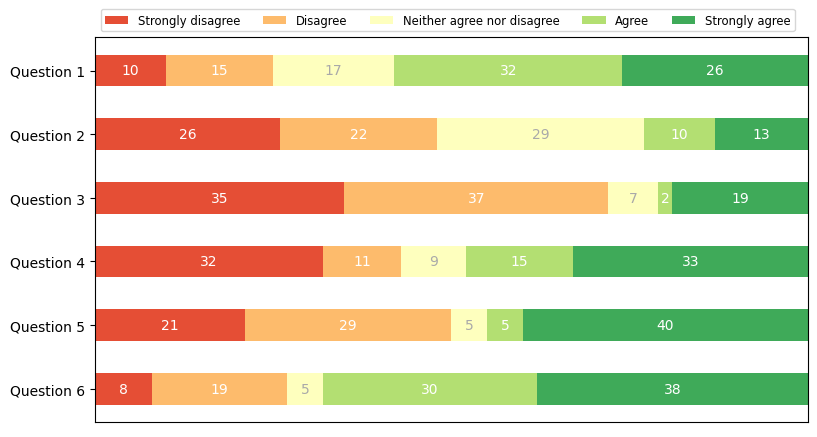

In [3]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()